# Metodogía

Despues de seleccionar el dataset se visualiza las imagenes que contiene el mismo. Se aplica un método de aumento de datos para tener suficientes imagenes de entrenamiento, este aumento de dato consta de crear nuevas imagenes con las ya existente al realizarle transformaciones como son la rotación, movimientos horizontales o verticales y procesos de reflexión. Posteriormente se realiza un analisis por canales de colores para determinar cuales son los más indicados para aislar la enfermedad de royal del resto de la hoja. A continuación, se utiliza los histogramas para conocer la distribución de pixeles dependiendo de la intensidad de colores en la imagen. Se utilizara estos valores para aislar el color caracteristico de la enfermedad y con ello conocer en que sitio de la imagen se ubica el royal. Apartir de la librería de tensorflow se pretender crear una red neuronal convolucional para clasificar las imagenes como positivas para la enfermedad del Royal o no. Lo primero es entrenar las primeras capas con 80% para entrenamiento de las imagenes totales del dataset, 10% para verificación y 10% para pruebas. Se define la arquitectura del modelo por lo que se genera una capa de entrada con la función de activación relu. Tenemos 3 capas intermedias y una capa de salida con "sigmoid" debido a su capacidad de arrojar una probabilidad de que la imagen pertenezca a positivo de royal o no. Al final de la última capa se debe de estar clasificando exitosamente las imagenes con royal. La metricas de evaluación sera la exactitud para las imagenes de entrenamiento y validación. Las capas sufren un proceso de convolción con un kernel aleatorio. Se maneja una imagen 128x128 por 3 canales los cuales son RGB.

Para la detección del royal se utilizara las siguientes librerías:
- **CV2**: OpenCV es ampliamente utilizado en aplicaciones que involucran reconocimiento de objetos, seguimiento de movimiento, detección de rostros, procesamiento de imágenes,etc. En nuestro proyecto es esencial para la lectura de imagen y sus transformaciones.
- **Numpy**: Permite trabajar con el algebra de vectores y arreglos númericos en forma matricial. Recordando que las imagenes son matrices de pixeles se vuelve primordial el uso de esta librería para transformaciones númericas de las imagenes.
- **Matplotlib**: La librería nos permite realizar graficos y mostrar las imagenes dentro de la libreta. Además, nos permite agregar información útil en los graficos como nombres y titulos.
- **Tensorflow**: Es una biblioteca de Google que se utilizará para la tarea de aprendizaje automático en plantas con royal. Esta herramienta es la que nos permitira la creacción y especialización de modelos de aprendizajes para reconocer el royal de aquellas hojas saludables.

Escoge el tipo: yuv
Escoge el tipo: hsv
Escoge el tipo: yuv
Escoge el tipo: xyz


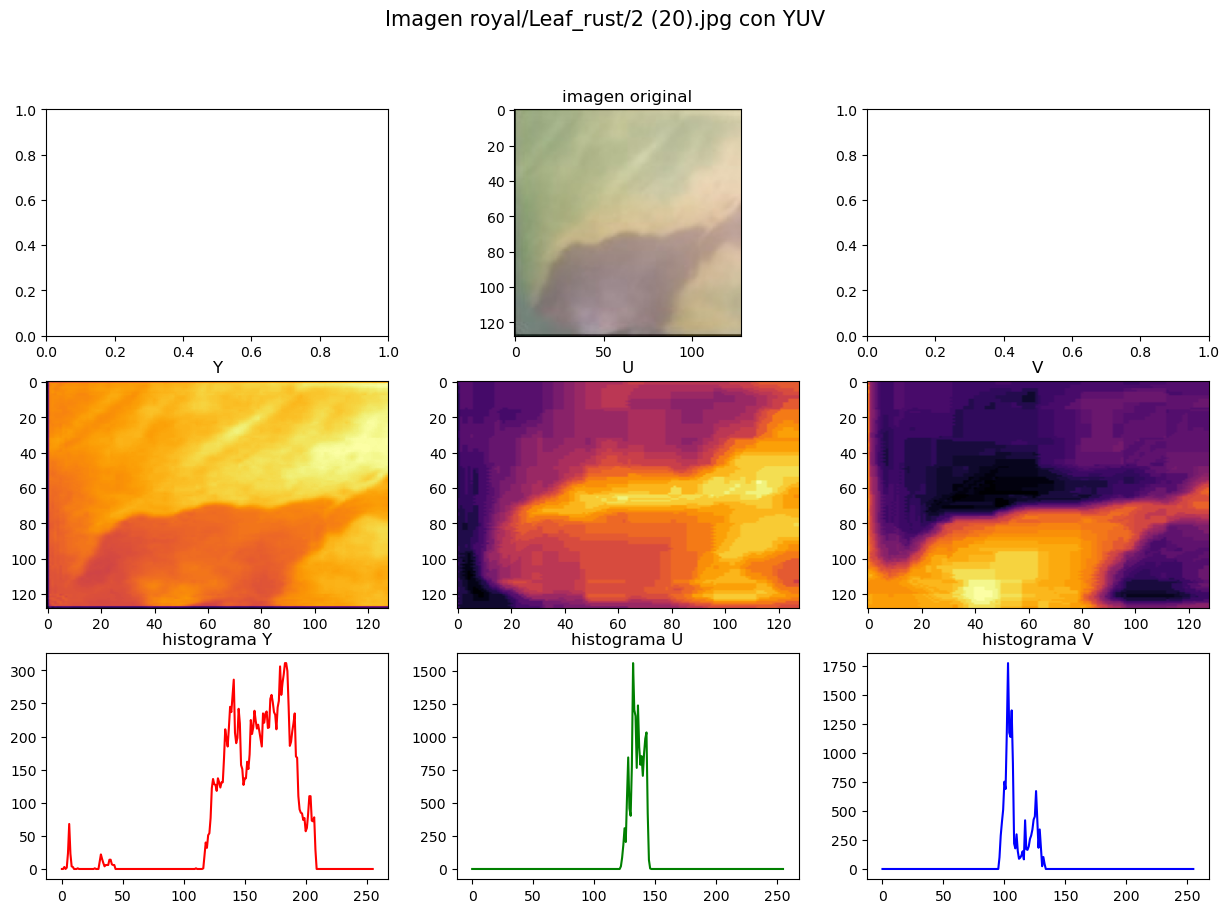

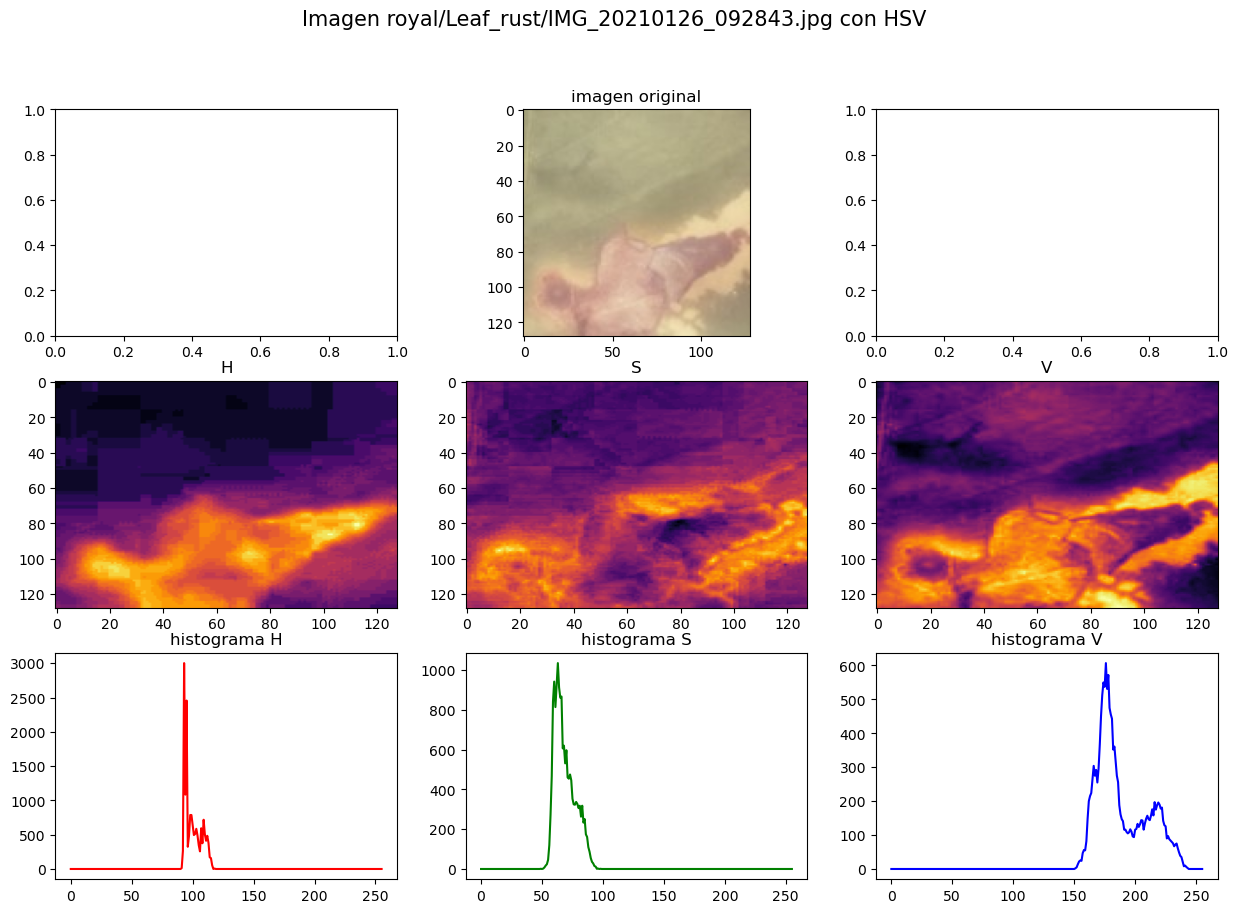

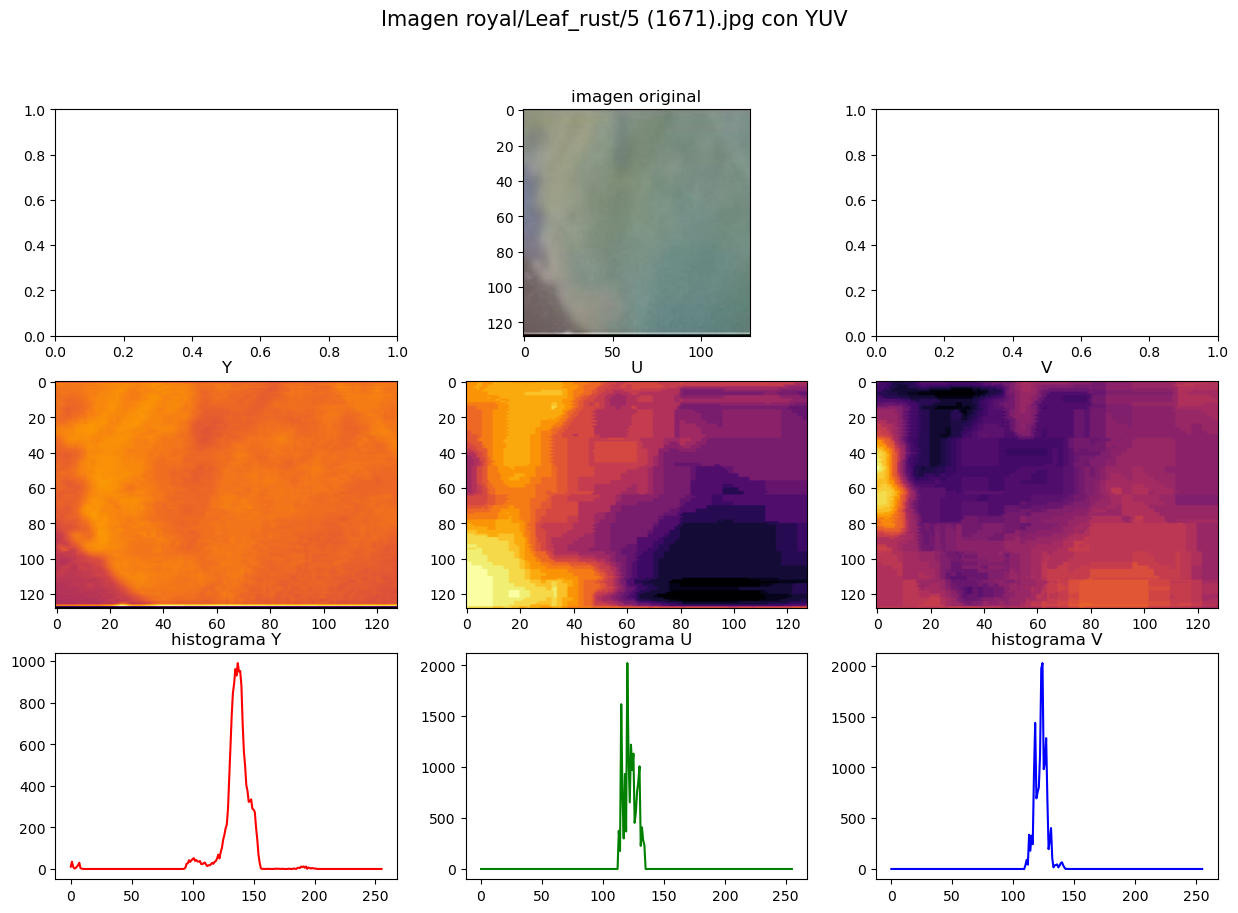

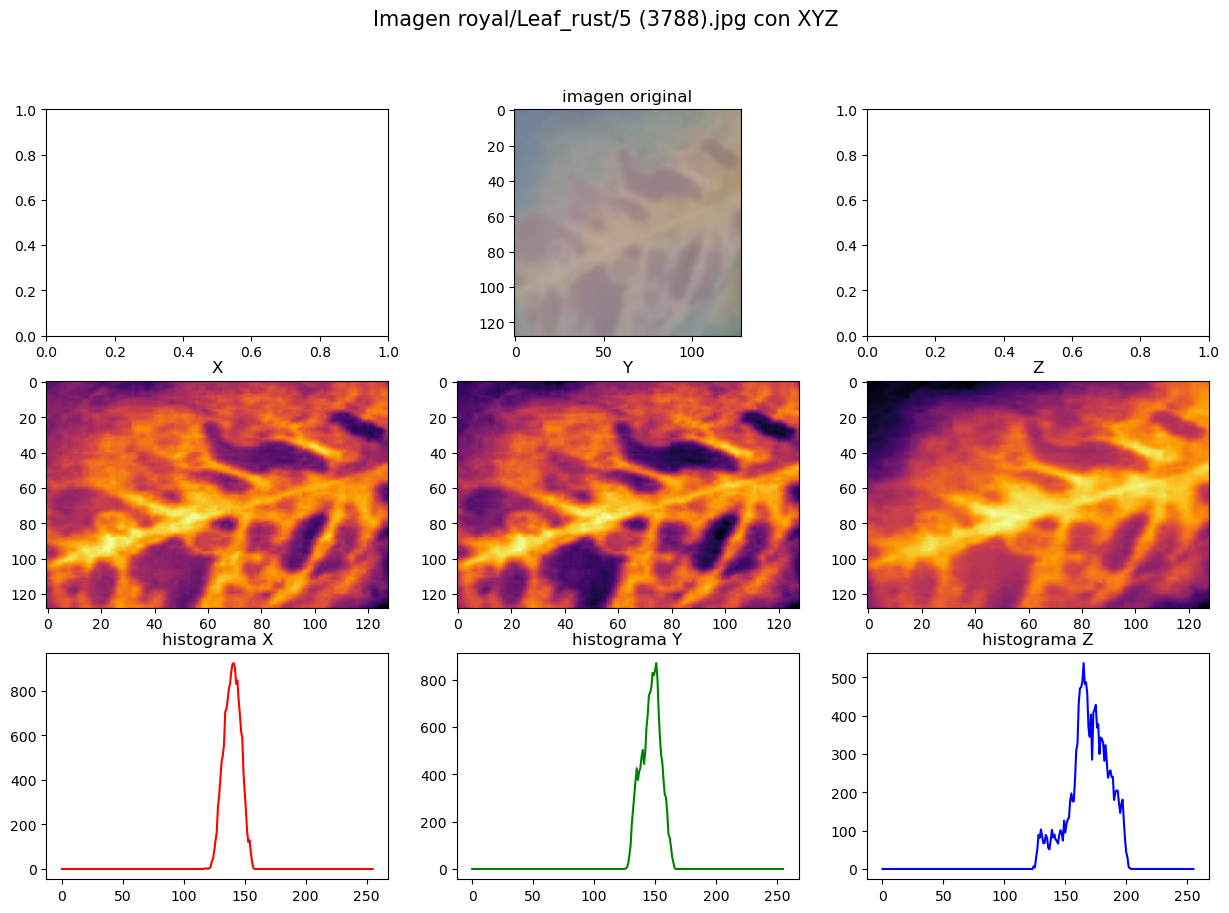

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def binarizacion(tipo,imagen,rangomincanal1,rangomaxcanal1,rangomincanal2,rangomaxcanal2,rangomincanal3,rangomaxcanal3):
    if tipo=='RGB':
        imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB) #RGB        
    elif tipo=='HSV':
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2HSV) #Convertir a HSV no sirve
    elif tipo=='HSV':
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2LAB) #Convertir a LAB
    elif tipo=='YUV':
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2YUV) #Convertir a YUV
    elif tipo=='XYZ':
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2XYZ) #Convertir a XYZ
    # Divide la imagen en canales 
    canal_1 = imagen[:, :, 0]
    canal_2 = imagen[:, :, 1]
    canal_3 = imagen[:, :, 2]
    _, imagen_binarizada1 = cv2.threshold(canal_1,rangomincanal1,rangomaxcanal1, cv2.THRESH_BINARY)
    _, imagen_binarizada2 = cv2.threshold(canal_2,rangomincanal2,rangomaxcanal2, cv2.THRESH_BINARY)
    _, imagen_binarizada3 = cv2.threshold(canal_3,rangomincanal3,rangomaxcanal3, cv2.THRESH_BINARY)
    
    return imagen_binarizada1,imagen_binarizada2,imagen_binarizada3
       
    
def histograma(tipo,imagen):
    if tipo=='RGB':
        imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB) #RGB
        canales=['R','G','B']
    elif tipo=='HSV':
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2HSV) #Convertir a HSV 
        canales=['H','S','V']
    elif tipo=='LAB':
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2LAB) #Convertir a LAB
        canales=['L','A','B']
    elif tipo=='YUV':
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2YUV) #Convertir a YUV
        canales=['Y','U','V']
    elif tipo=='XYZ':
        imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2XYZ) #Convertir a XYZ
        canales=['X','Y','Z']
    canal_1 = imagen[:, :, 0]
    canal_2 = imagen[:, :, 1]
    canal_3 = imagen[:, :, 2]
    hist_1 = cv2.calcHist([canal_1], [0], None, [256], [0, 256])
    hist_2 = cv2.calcHist([canal_2], [0], None, [256], [0, 256])
    hist_3 = cv2.calcHist([canal_3], [0], None, [256], [0, 256])
    
    return canal_1,canal_2,canal_3,hist_1,hist_2,hist_3,canales
 
    
# Cargar la imagen 1
path=['royal/Leaf_rust/2 (20).jpg','royal/Leaf_rust/IMG_20210126_092843.jpg',
    'royal/Leaf_rust/5 (1671).jpg','royal/Leaf_rust/5 (3788).jpg']

for i in path:
    imagen=cv2.imread(i)
       
    guardar=[]
    tipo= str(input('Escoge el tipo: ')).upper()
    guardar.append(tipo)
    # Calcula el histograma para cada canal de color
    c1,c2,c3,hist1,hist2,hist3,nombre= histograma(tipo,imagen)    
    
    #creación de subplots
    fig,((x1,x2,x3),(x4,x5,x6),(x7,x8,x9))=plt.subplots(3,3,figsize=(15, 10))
    fig.suptitle(f'Imagen {i} con {tipo} ', fontsize=15)
    
    x2.set_title(f'imagen original')
    x2.imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
    
    x4.set_title(f'{nombre[0]}')
    x4.imshow(c1,cmap='inferno', aspect='auto')

    x5.set_title(f'{nombre[1]}')
    x5.imshow(c2,cmap='inferno', aspect='auto')

    x6.set_title(f'{nombre[2]}')
    x6.imshow(c3,cmap='inferno',aspect='auto')
    
    # Dibuja los histogramas
    x7.set_title(f'histograma {nombre[0]}')
    x7.plot(hist1, color='red')

    x8.set_title(f'histograma {nombre[1]}')
    x8.plot(hist2, color='green')

    x9.set_title(f'histograma {nombre[2]}')
    x9.plot(hist3, color='blue')
        

valor min canal1 de royal/Leaf_rust/2 (20).jpg: 155
valor max canal1 de royal/Leaf_rust/2 (20).jpg: 160
valor min canal2 de royal/Leaf_rust/2 (20).jpg: 120
valor max canal2 de royal/Leaf_rust/2 (20).jpg: 130
valor min canal3 de royal/Leaf_rust/2 (20).jpg: 100
valor max canal3 de royal/Leaf_rust/2 (20).jpg: 102
valor min canal1 de royal/Leaf_rust/IMG_20210126_092843.jpg: 120
valor max canal1 de royal/Leaf_rust/IMG_20210126_092843.jpg: 250
valor min canal2 de royal/Leaf_rust/IMG_20210126_092843.jpg: 150
valor max canal2 de royal/Leaf_rust/IMG_20210126_092843.jpg: 250
valor min canal3 de royal/Leaf_rust/IMG_20210126_092843.jpg: 110
valor max canal3 de royal/Leaf_rust/IMG_20210126_092843.jpg: 100
valor min canal1 de royal/Leaf_rust/5 (1671).jpg: 100
valor max canal1 de royal/Leaf_rust/5 (1671).jpg: 120
valor min canal2 de royal/Leaf_rust/5 (1671).jpg: 130
valor max canal2 de royal/Leaf_rust/5 (1671).jpg: 110
valor min canal3 de royal/Leaf_rust/5 (1671).jpg: 115
valor max canal3 de royal/Le

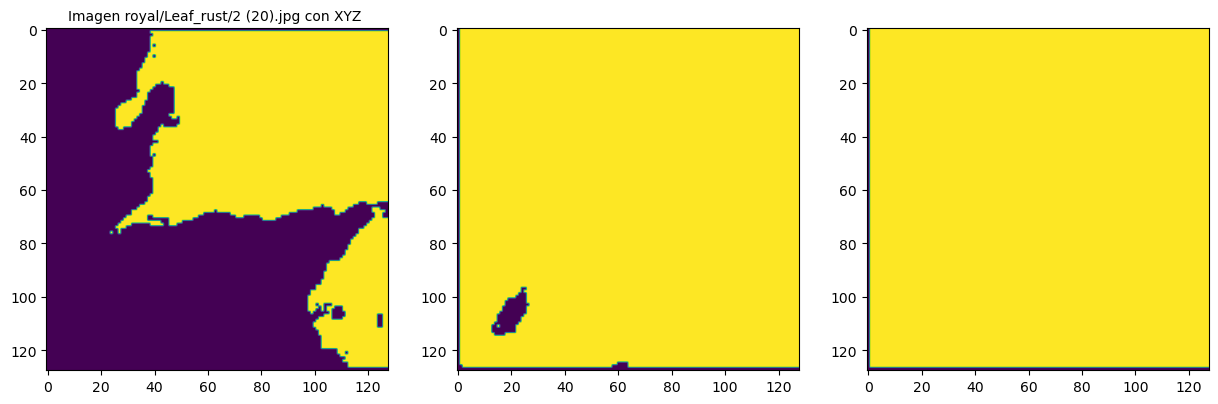

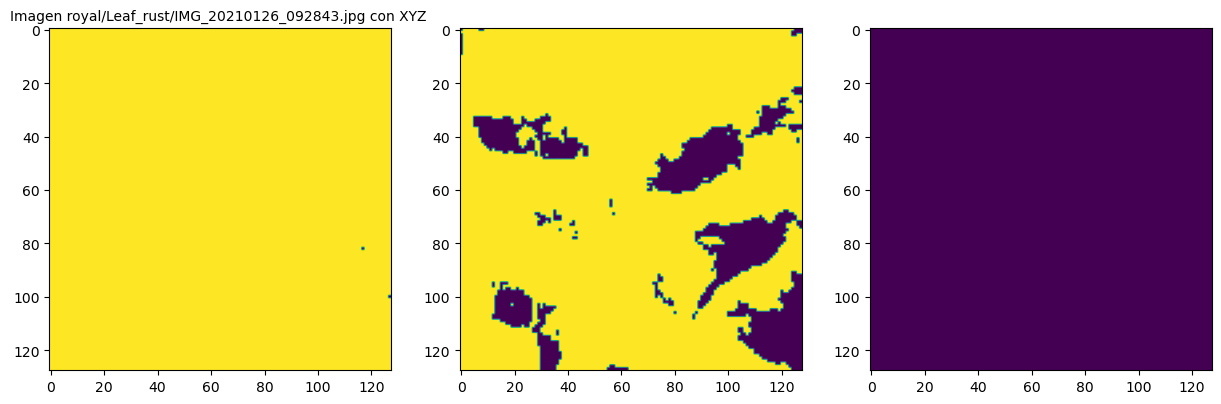

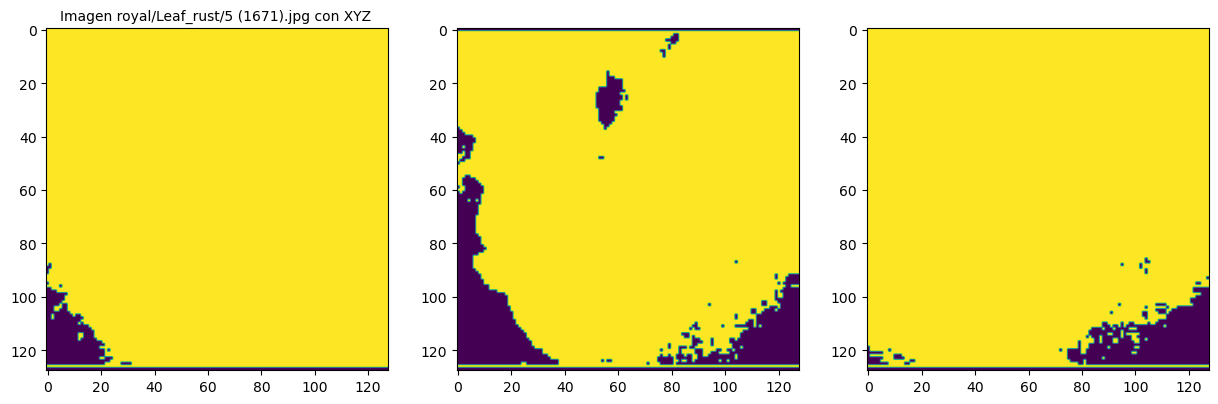

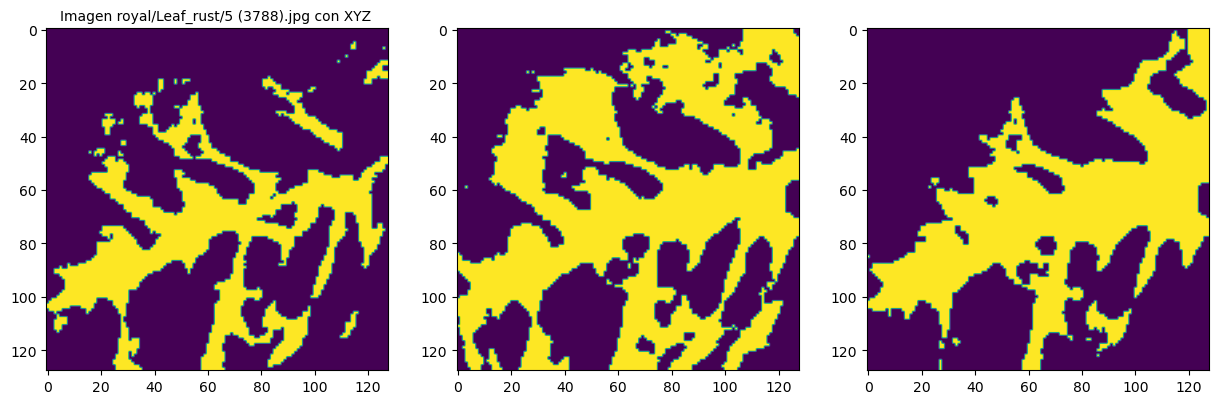

In [137]:
#valores maximo y minimos para la binarizacion
for o in path:
    cont=0
    imagen=cv2.imread(o)
        
    vamin_can_1=int(input(f'valor min canal1 de {o}: '))
    vamax_can_1=int(input(f'valor max canal1 de {o}: '))

    vamin_can_2=int(input(f'valor min canal2 de {o}: '))
    vamax_can_2=int(input(f'valor max canal2 de {o}: '))

    vamin_can_3=int(input(f'valor min canal3 de {o}: '))
    vamax_can_3=int(input(f'valor max canal3 de {o}: '))
    
    fig,(x7,x8,x9)=plt.subplots(1,3,figsize=(15, 25))
        
    #funcion de histogramas y binarizacion
    imb1,imb2,imb3= binarizacion(guardar[cont],imagen,vamin_can_1,vamax_can_1,vamin_can_2,vamax_can_2,vamin_can_3,vamax_can_3)
    
    # grafica de binarizacion
    x7.set_title(f'Imagen {o} con {tipo} ', fontsize=10)
    x7.imshow(imb1)
    x8.imshow(imb2)
    x9.imshow(imb3)
    cont=cont+1

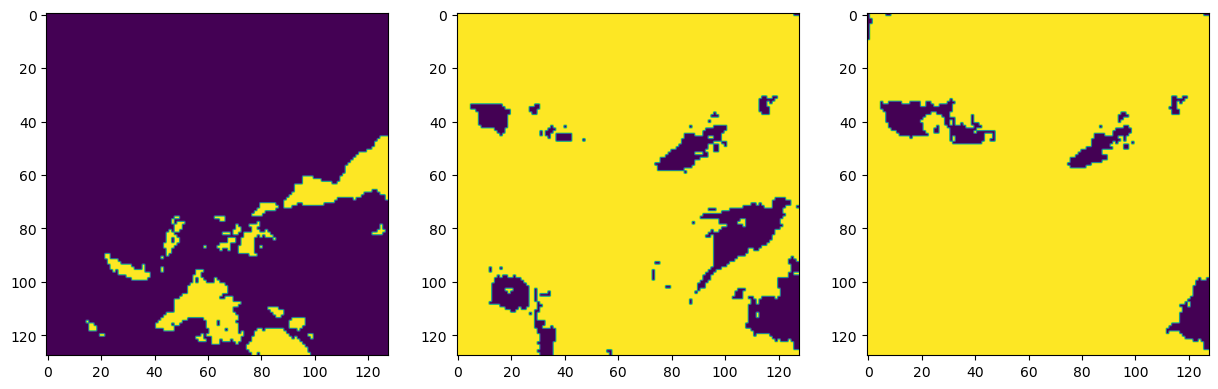

In [157]:

imagen=cv2.imread(path[1])
       
vamin_can_1= 173
vamax_can_1= 176

vamin_can_2=147
vamax_can_2=145

vamin_can_3=175
vamax_can_3=177
    
fig,(x1,x2,x3)=plt.subplots(1,3,figsize=(15, 25))
    
#funcion de histogramas y binarizacion
imb1,imb2,imb3= binarizacion('XYZ',imagen,vamin_can_1,vamax_can_1,vamin_can_2,vamax_can_2,vamin_can_3,vamax_can_3)
    
# grafica de binarizacion
x1.imshow(imb1)
x2.imshow(imb2)
x3.imshow(imb3)


YUV,HSV,YUV,XYZ